In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [4]:
training = pd.read_csv('../data/for_visualization.csv')

# 1. Line chart of certain horse's performance

In [5]:
def linechart(horse_id):
    recent_6_runs = training[training.horse_id == horse_id]['recent_6_runs'][-1:].tolist()[0]

    recent_6_runs = list(map(int,recent_6_runs.split('/')))[::-1]
    print(recent_6_runs)
    game_id = training[training.horse_id == horse_id][['race_id']][-6:]
    print(game_id)
    plt.plot(game_id.iloc[:,0], recent_6_runs, marker = '+')
    plt.xlabel('Game_id')
    plt.ylabel('Ranks of recent 6 runs')
    plt.title('Line Chart of recent 6 runs'+'- Horse ' + horse_id)
    plt.ylim((0, 14))
    plt.show()

[5, 2, 7, 3, 9, 7]
        race_id
14042  2015-348
14648  2015-398
15332  2015-453
15782  2015-490
16395  2015-538
17609  2015-638


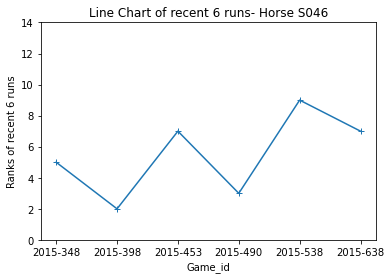

In [9]:
horse_id = 'S046'
linechart(horse_id)

# 2. Scatter plot of the best jockeys and horses

<ipython-input-12-7bbc550a297a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['no_win'][i] = ranks.count(1)
<ipython-input-12-7bbc550a297a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['win_rate'][i] = ranks.count(1) / float(len(ranks))
<ipython-input-12-7bbc550a297a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['no_win'][i] = ranks.count(1)
<ipython-input-12-7bbc550a297a>:19: SettingWithCopyWarning: 
A value is tryin

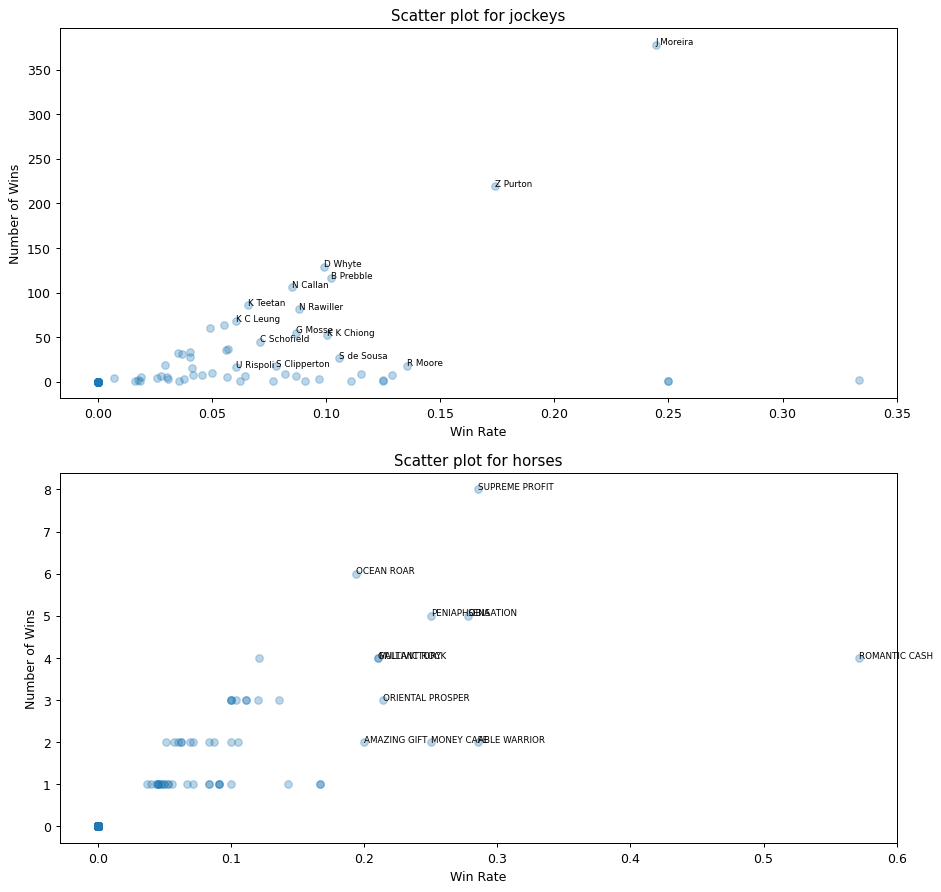

In [12]:
jockey = training.jockey.unique()
a = pd.DataFrame()
a['jockey'] = jockey
a['no_win'] = 0
a['win_rate'] = 0.0
for i in range(len(jockey)):
    ranks = training[training.jockey == jockey[i]]['finishing_position'].tolist()
    a['no_win'][i] = ranks.count(1)
    a['win_rate'][i] = ranks.count(1) / float(len(ranks))

horse = training.horse_name.unique()
b = pd.DataFrame()
b['horse'] = horse
b['no_win'] = 0
b['win_rate'] = 0.0
for i in range(len(jockey)):
    ranks=training[training.horse_name == horse[i]]['finishing_position'].tolist()
    b['no_win'][i] = ranks.count(1)
    b['win_rate'][i] = ranks.count(1) / float(len(ranks))

figure(num = None, figsize = (12, 12), dpi = 90, facecolor = 'w', edgecolor = 'k')
plt.subplot(2,1,1)
plt.scatter(a['win_rate'],a['no_win'],alpha = 0.3)
plt.title('Scatter plot for jockeys')
plt.xlabel('Win Rate')
plt.ylabel('Number of Wins')
for i in range(len(jockey)):
    if a['no_win'][i] >= 10 and a['win_rate'][i] >= 0.06:
        plt.annotate(a['jockey'][i],(a['win_rate'][i],a['no_win'][i]),size = 7)


plt.subplot(2,1,2)
plt.scatter(b['win_rate'],b['no_win'],alpha=0.3)
plt.title('Scatter plot for horses')
plt.xlabel('Win Rate')
plt.ylabel('Number of Wins')
for i in range(len(horse)):
    if b['no_win'][i] >= 2 and b['win_rate'][i] >= 0.15:
        plt.annotate(b['horse'][i],(b['win_rate'][i],b['no_win'][i]),size = 7)
        

plt.show()

# 3. Pie chart of the winning rate of draws

In [16]:
win_prob = []
for i in range(1,16,1):
    win_prob.append(training[training.draw == i]['finishing_position'].tolist().count(1) / float(len(training[training.draw == i])))

print(win_prob)

[0.11540526033279656, 0.09339774557165861, 0.0962566844919786, 0.07441113490364026, 0.09129967776584318, 0.07568438003220612, 0.06935483870967742, 0.07542051003798156, 0.07633587786259542, 0.0661111111111111, 0.06157354618015964, 0.07340553549939831, 0.06041923551171394, 0.0777479892761394, 0.0]


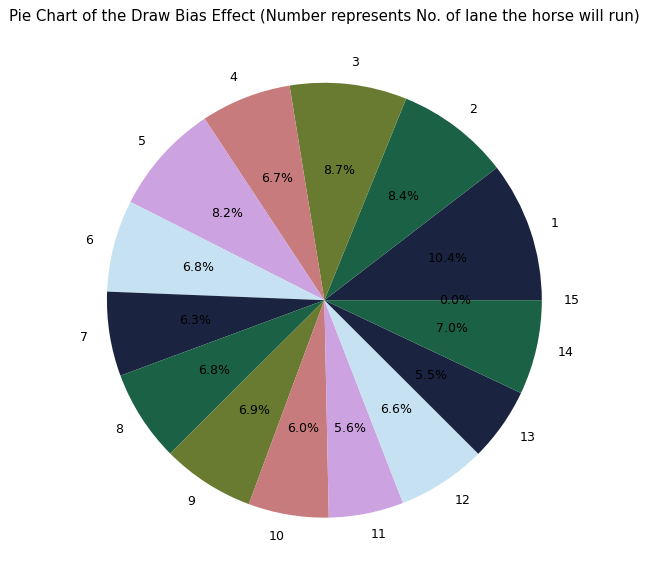

In [17]:
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
figure(num = None, figsize = (8, 8), dpi = 90, facecolor = 'w', edgecolor = 'k')
plt.pie(win_prob,labels = labels,autopct = '%1.1f%%', colors = sns.color_palette("cubehelix"))
plt.title('Pie Chart of the Draw Bias Effect (Number represents No. of lane the horse will run)')
plt.show()

# 4. Bar chart and line chart of the winning rate of different horses' weights and ages

In [18]:
runs = pd.read_csv("../data/runs.csv")
races = pd.read_csv('../data/races.csv')

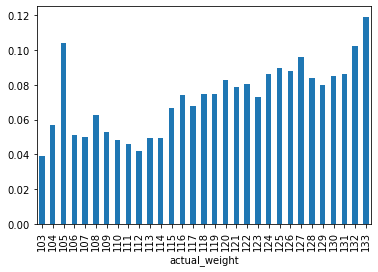

In [21]:
#Data Analysis for horse Weight with Won Probability
result = runs.groupby(['actual_weight'])['won'].mean()
result.plot.bar();

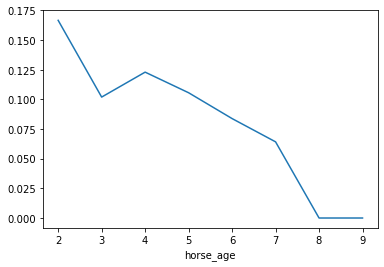

In [19]:
#Data Analysis for Heavy Horse Weight with Age to analyst Won Probability
result = runs[runs.actual_weight.isin(['133', '132', '131'])].groupby(['horse_age'])['won'].mean()
result.plot();

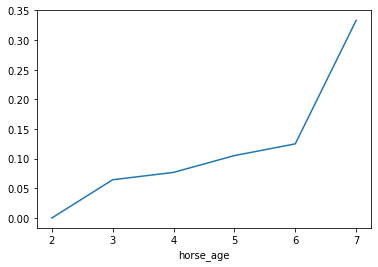

In [20]:
#Data Analysis for Light Horse Weight with Age to analyst Won Probability
result = runs[runs.actual_weight.isin(['103', '104', '105'])].groupby(['horse_age'])['won'].mean()
result.plot();